In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load datasets
customers = pd.read_csv(r"D:\Data Science\New folder\Customers.csv")
products = pd.read_csv(r"D:\Data Science\New folder\Products.csv")
transactions = pd.read_csv(r"D:\Data Science\New folder\Transactions.csv")

In [4]:
# Display first few rows of each dataset
print("Customers Data:")
print(customers.head())
print("\nProducts Data:")
print(products.head())
print("\nTransactions Data:")
print(transactions.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

In [5]:
# Check for missing values
print("\nMissing Values:")
print("Customers:")
print(customers.isnull().sum())
print("Products:")
print(products.isnull().sum())
print("Transactions:")
print(transactions.isnull().sum())


Missing Values:
Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [6]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [7]:
# Basic statistics
print("\nBasic Statistics:")
print(transactions.describe())


Basic Statistics:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639


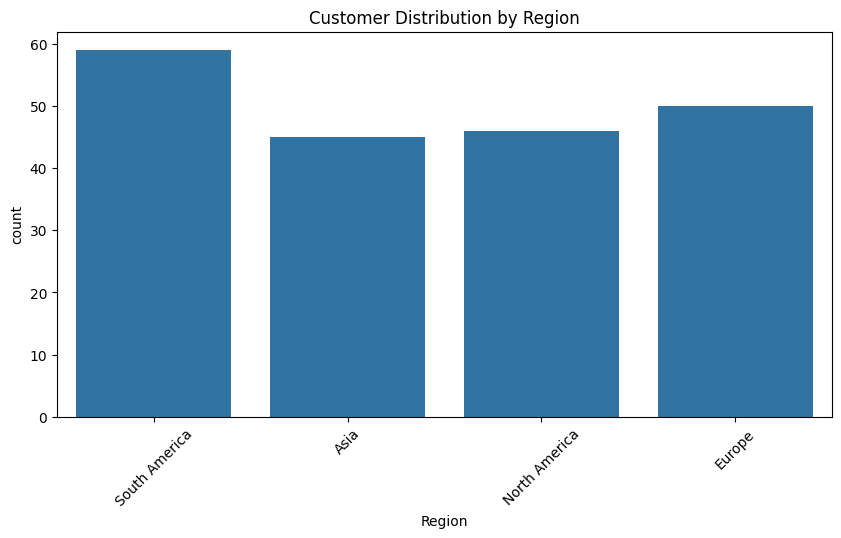

In [8]:

# Data visualization
plt.figure(figsize=(10,5))
sns.countplot(x='Region', data=customers)
plt.title("Customer Distribution by Region")
plt.xticks(rotation=45)
plt.show()

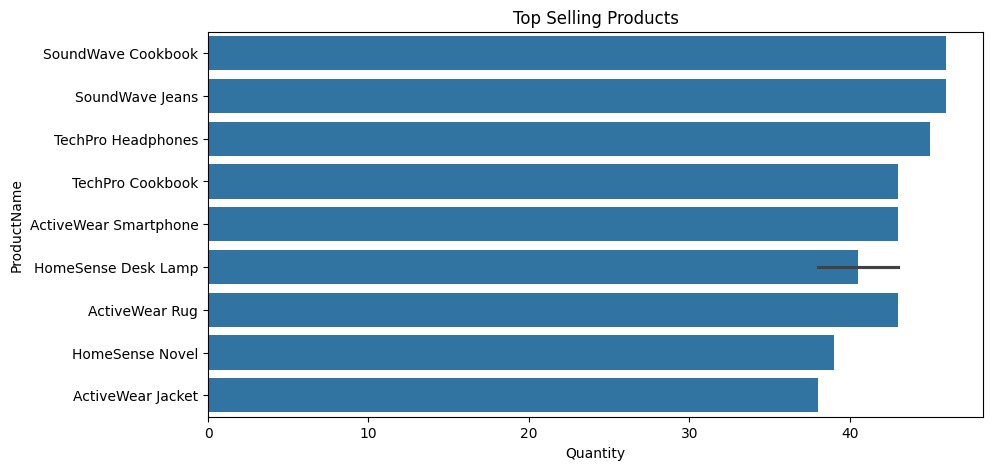

In [9]:

# Top selling products
top_products = transactions.groupby('ProductID')['Quantity'].sum().reset_index()
top_products = top_products.merge(products, on='ProductID').sort_values(by='Quantity', ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(y='ProductName', x='Quantity', data=top_products.head(10))
plt.title("Top Selling Products")
plt.show()

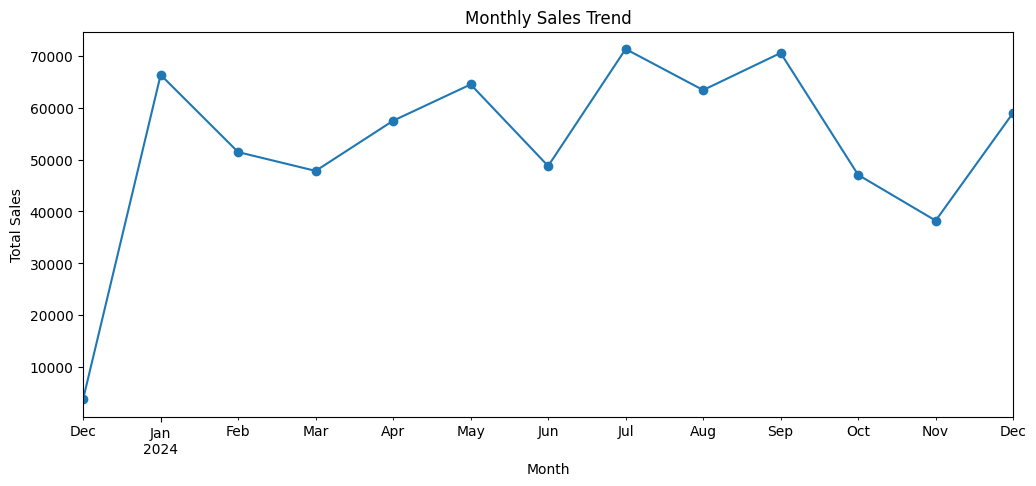

In [10]:
# Sales trend over time
transactions['MonthYear'] = transactions['TransactionDate'].dt.to_period('M')
sales_trend = transactions.groupby('MonthYear')['TotalValue'].sum()
sales_trend.plot(kind='line', figsize=(12,5), marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

In [16]:
# Save cleaned datasets for further analysis
customers.to_csv(r"D:\Data Science\New folder\cleaned Customers.csv", index=False)
transactions.to_csv(r"D:\Data Science\New folder\cleaned Transactions.csv", index=False)
products.to_csv(r"D:\Data Science\New folder\cleaned Products.csv", index=False)

print("EDA Completed. Cleaned data saved.")

EDA Completed. Cleaned data saved.
